In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# IMG MANIPULATION
from scipy import ndimage
from scipy import misc as scipyMisc

# Additional:
# LIME needs to be installed via pip

def load_model(path):
    loaded = tf.keras.models.load_model(
        path,
        custom_objects=None,
        compile=False
    )
    loaded.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return loaded

def load_ppm_image(path):
    i = mpimg.imread(path)
    a = scipyMisc.imresize(i, (64,64,3), interp='bicubic', mode=None)
    return a

def predict_single_image(model,img):
    imgArr = (np.expand_dims(img,0))
    imgArr = imgArr/255
    return model.predict(imgArr)[0],img

In [3]:
aphrodite = load_model("Aphrodite.h5")
aphrodite.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 128)       0         
__________

C:\Users\lguts\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


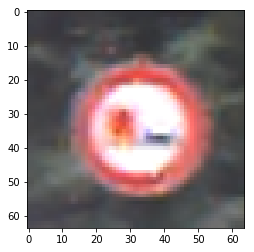

In [6]:
lkwÜVerbot = load_ppm_image("lkwÜVerbot.ppm")
plt.imshow(lkwÜVerbot)
plt.show()

In [7]:
s,i=predict_single_image(aphrodite,lkwÜVerbot)
s.argmax(),s[s.argmax()]

(10, 1.0)

In [12]:
from lime import lime_image
import time
# To show the image with a mask
from skimage.segmentation import mark_boundaries

In [10]:
explainer = lime_image.LimeImageExplainer()

In [11]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(lkwÜVerbot/255, aphrodite.predict, top_labels=43, hide_color=0, num_samples=1000)

Wall time: 4.15 s


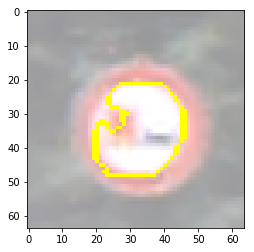

In [13]:
temp, mask = explanation.get_image_and_mask(10, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

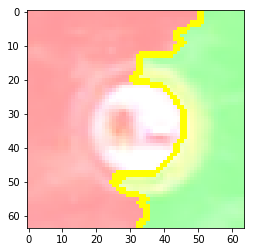

In [14]:
temp, mask = explanation.get_image_and_mask(11, positive_only=False, num_features=15, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

C:\Users\lguts\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


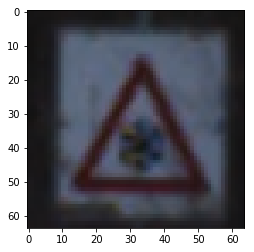

In [15]:
frostImg = load_ppm_image("frost.ppm")
plt.imshow(frostImg)
plt.show()

In [16]:
%%time
s2,_=predict_single_image(aphrodite,frostImg)
explanation2 = explainer.explain_instance(frostImg/255, aphrodite.predict, top_labels=43, hide_color=0, num_samples=1000)
print(s2.argmax(),s2[s2.argmax()])

30 1.0
Wall time: 3.78 s


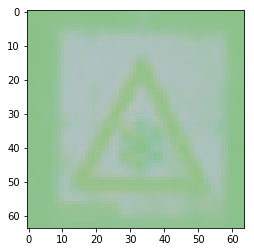

In [17]:
temp, mask = explanation2.get_image_and_mask(30, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

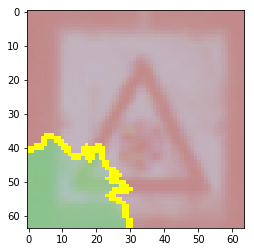

In [18]:
temp, mask = explanation2.get_image_and_mask(29, positive_only=False, num_features=15, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

C:\Users\lguts\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


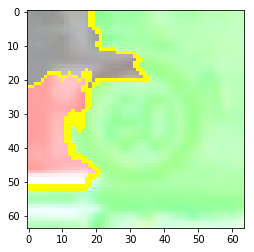

Wall time: 34.6 s


In [21]:
%%time
#Label for "60" is 3
sechzigImg = load_ppm_image("60.ppm")
explanation4 = explainer.explain_instance(sechzigImg/255, aphrodite.predict, top_labels=10, hide_color=0, num_samples=10000)
temp, mask = explanation4.get_image_and_mask(3, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

C:\Users\lguts\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


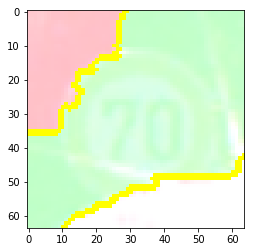

Wall time: 40.2 s


In [23]:
%%time
#Label for "70" is 4
siebzigImg = load_ppm_image("70.ppm")
explanation5 = explainer.explain_instance(siebzigImg/255, aphrodite.predict, top_labels=10, hide_color=0, num_samples=10000)
temp, mask = explanation5.get_image_and_mask(4, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

## Big Aphrodite
Sanitycheck with my much better Model!

Not in the Repo, sorry, its 50mb

In [121]:
bigAphrodite = load_model("BigAphrodite.h5")
bigAphrodite.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 256)       147712    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
__________

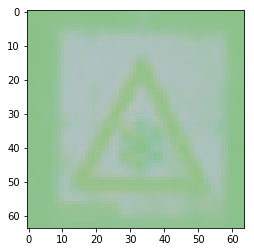

Wall time: 1min 38s


In [127]:
%%time
explanation3 = explainer.explain_instance(frostImg/255, bigAphrodite.predict, top_labels=43, hide_color=0, num_samples=10000)
temp, mask = explanation3.get_image_and_mask(30, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

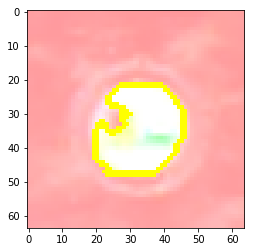

Wall time: 8.63 s


In [126]:
%%time
explanation4 = explainer.explain_instance(lkwÜVerbot/255, bigAphrodite.predict, top_labels=43, hide_color=0, num_samples=1000)
temp, mask = explanation4.get_image_and_mask(10, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()